In [1]:
%pylab inline

pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Moire_TBG_phonons/BM_bandstructure"
pathchow='/home/jfm343/Documents/BM_bandstructure'
pathpc='/home/juan/Documents/Projects/BM_bandstructure'

import numpy as np
import pandas as pd
import os
import sys

mach='pc'

if mach=='Mac':
    pathy=pathMAC
    path_data=pathy+'/data'
    sys.path.insert(0, pathy+'/Mods_disp')
    sys.path.insert(0, pathy+'/Mods_corr')
if mach=='pc':
    pathy=pathpc
    path_data=pathy+'/data'
    sys.path.insert(0, pathy+'/Mods_disp')
    sys.path.insert(0, pathy+'/Mods_corr')

import Dispersion
import MoireLattice
from scipy import linalg as la
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
from SCF_M_point import Mean_field_M
import pickle
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size'   : 14})
rc('text', usetex=False)


Populating the interactive namespace from numpy and matplotlib


In [2]:
Nsamp=4
theta=1.05*np.pi/180  # magic angle
c6sym=True
umkl=0 #the number of umklaps where we calculate an observable ie Pi(q), for momentum transfers we need umkl+1 umklapps when scattering from the 1bz
l=MoireLattice.MoireTriangLattice(Nsamp,theta,0,c6sym,umkl)
lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2,c6sym,umkl) #this one is normalized
[q1,q2,q3]=l.q
q=np.sqrt(q1@q1)

starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.006789445877075195  s
size of q before symmetr... 16
size of q after symmetr... 19
size of q before symmetr... 16
size of q after symmetr... 19
16 1bz numer of sampling lattice points
19 1bz numer of sampling lattice points c3
19 X numer of sampling lattice points
112 Q numer of sampling lattice points
the shape of the index q array (16, 19)
1 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (16, 1)
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.005436420440673828  s
size of q before symmetr... 16
size of q after symmetr... 19
size of q before symmetr... 16
size of q after symmetr... 19
16 1bz numer of sampling lattice points
19 1bz numer of sampling lattice points c3
19 X numer of sampling lattice points
112 Q numer of sampling lattice points
the shape of the index q array (16, 19)
1 G numer of sampling rec

In [3]:
evtoK=11604.5250061598

In [4]:
fullpath=path_data+'/g3_12_2023-04-11-18-56-55/g3_12_1.05/data_mu_0_g2_3.h5'
dff12 = pd.read_hdf(fullpath)



findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern


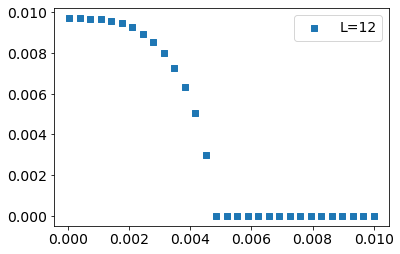

In [5]:
plt.scatter(dff12['T'], dff12['D'], marker='s', label='L=12')
plt.legend()

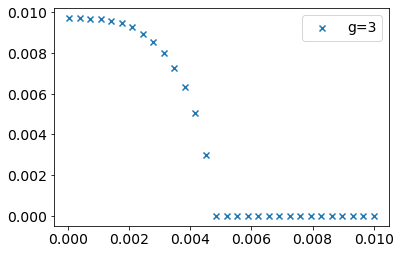

In [8]:
plt.scatter(dff12['T'], dff12['D'], marker='x', label='g=3')
plt.legend()

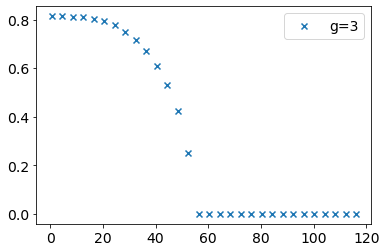

In [9]:
plt.scatter(evtoK*dff12['T'], np.array(dff12['D'])/(np.array(dff12['bet'])*q), marker='x', label='g=3')
plt.legend()

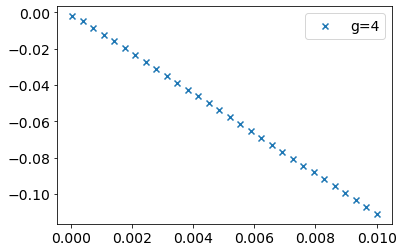

In [11]:
plt.scatter(dff12['T'], dff12['F0'], marker='x', label='g=4')
plt.legend()



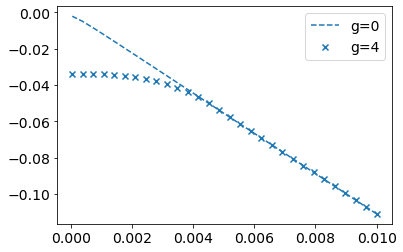

In [12]:
plt.plot(dff12['T'], dff12['F0'], ls='--', label='g=0')
# plt.legend()
plt.scatter(dff12['T'], dff12['FSC'], marker='x', label='g=4')
plt.legend()

In [13]:
fullpath=path_data+'/g3_12_2023-04-11-18-56-55/g3_12_1.05/data_mu_0_g2_3.pkl'
# Read the object from the pickle file
with open(fullpath, 'rb') as file:
    B1 = pickle.load(file)


In [15]:
[Eval_plus,Eval_min]=B1.precompute_E_MBZ( args=(np.array(dff12['D'])[-2],0.0,0.0))
df_disp1=pd.DataFrame({'kx': B1.latt.KX, 'ky': B1.latt.KY, 'dp0': Eval_plus[:,0], 'dp1': Eval_plus[:,1], 'dp2': Eval_plus[:,2], 'dp3': Eval_plus[:,3],'dm0': Eval_min[:,0],'dm1': Eval_min[:,1],'dm2': Eval_min[:,2],'dm3': Eval_min[:,3],'phi' :np.array(dff12['D'])[-1]*np.ones(B1.latt.Npoi) })



starting Disp.......
time for Disp... 0.04041242599487305


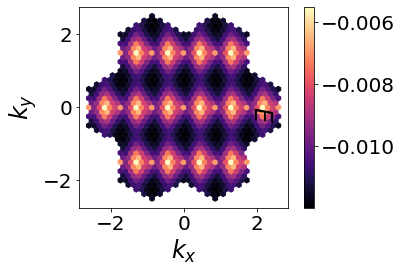

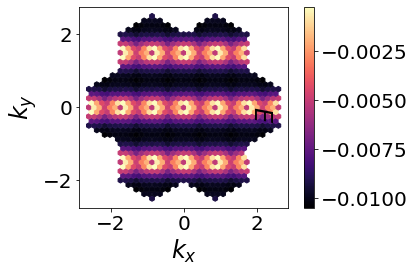

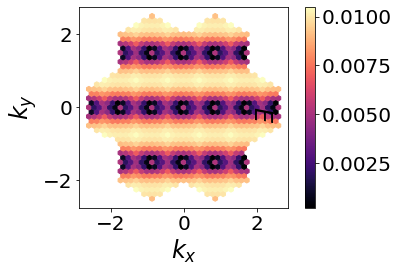

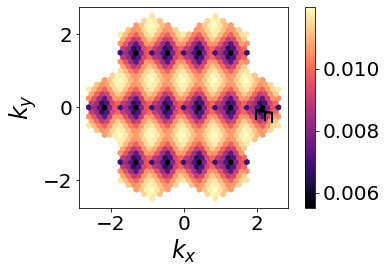

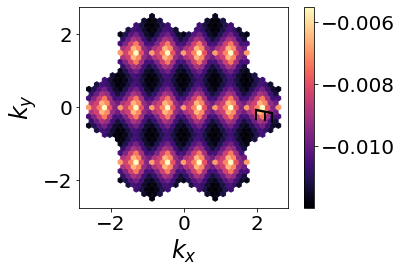

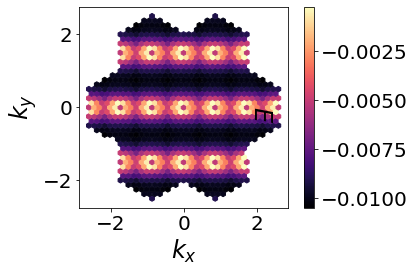

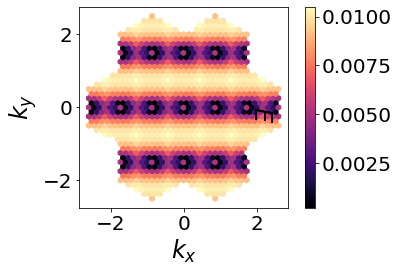

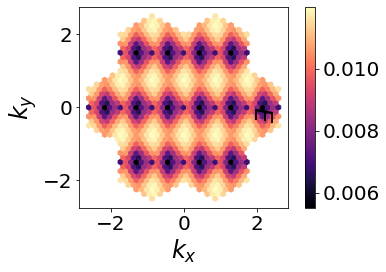

In [26]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    color_map = plt.cm.get_cmap('magma')
    
    # [KXc3z,KYc3z, Indc3z]=B1.latt.C3zLatt(d1,d2)
    # im=plt.scatter(d1,d2 ,c=d3[Indc3z[np.array(Indc3z, dtype=int)]],s=50, cmap=color_map, marker='h')
    # im=plt.scatter(d1,d2 ,c=d3[Indc3z],s=25, cmap=color_map, marker='h')
    im=plt.scatter(d1,d2 ,c=d3,s=30, cmap=color_map, marker='h')
    
    plt.xlabel(r'$k_x$', size=24)
    plt.ylabel(r'$k_y$', size=24)
    
    plt.xticks( size=20)
    plt.yticks( size=20)
    plt.text(1.8,-0.3,r'$E$', size=24, rotation=270) # npt [meV]
    
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=4)

    cbar = plt.colorbar(im)
    tick_font_size = 20
    cbar.ax.tick_params(labelsize=tick_font_size)
    plt.gca().set_aspect('equal')
    plt.tight_layout()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)

draw_heatmap( 'kx', 'ky', 'dm0',data=df_disp1)
plt.show()

draw_heatmap( 'kx', 'ky', 'dm1',data=df_disp1)
plt.show()

draw_heatmap( 'kx', 'ky', 'dm2',data=df_disp1)
plt.show()

draw_heatmap( 'kx', 'ky', 'dm3',data=df_disp1)
plt.show()

draw_heatmap( 'kx', 'ky', 'dp0',data=df_disp1)
plt.show()

draw_heatmap( 'kx', 'ky', 'dp1',data=df_disp1)
plt.show()

draw_heatmap( 'kx', 'ky', 'dp2',data=df_disp1)
plt.show()

draw_heatmap( 'kx', 'ky', 'dp3',data=df_disp1)
plt.show()

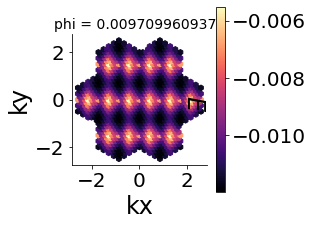

: 

In [27]:
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()

def draw_path(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    d4 = np.array(data.loc[:,args[3]])
    d5 = np.array(data.loc[:,args[4]])
    d6 = np.array(data.loc[:,args[5]])
    d7 = np.array(data.loc[:,args[2]])
    d8 = np.array(data.loc[:,args[3]])
    d9 = np.array(data.loc[:,args[4]])
    d10 = np.array(data.loc[:,args[5]])
    
    [path,kpath,HSP_index]=B1.latt.embedded_High_symmetry_path(d1,d2)
    pth=np.arange(np.size(path))
    plt.plot(d3[path], c='b')
    plt.plot(d4[path], c='b')
    plt.scatter(pth,d3[path], c='b', s=9)
    plt.scatter(pth,d4[path], c='b', s=9)
    plt.plot(d5[path], c='b')
    plt.plot(d6[path], c='b')
    plt.scatter(pth,d5[path], c='b', s=9)
    plt.scatter(pth,d6[path], c='b', s=9)
    
    
    plt.plot(d7[path], ls='--', c='r')
    plt.plot(d8[path], ls='--', c='r')
    plt.scatter(pth,d7[path], c='r', s=9)
    plt.scatter(pth,d8[path], c='r', s=9)
    plt.plot(d9[path], ls='--', c='r')
    plt.plot(d10[path], ls='--', c='r')
    plt.scatter(pth,d9[path], c='r', s=9)
    plt.scatter(pth,d10[path], c='r', s=9)
    
    for ind in HSP_index:
        plt.axvline(ind)


    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_disp1, col='phi',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'dm0', 'dm1','dm2','dm3', 'dp0', 'dp1','dp2', 'dp3', cbar=False, square = True)
# get figure background color

In [20]:
# [Eval_plus,Eval_min]=B1.precompute_E_MBZ( args=(np.array(dff3['D'])[0],0.0,0.0))

# df_disp=pd.DataFrame({'kx': B1.latt.KX, 'ky': B1.latt.KY, 'dp0': Eval_plus[:,0], 'dp1': Eval_plus[:,1], 'dp2': Eval_plus[:,2], 'dp3': Eval_plus[:,3],'dm0': Eval_min[:,0],'dm1': Eval_min[:,1],'dm2': Eval_min[:,2],'dm3': Eval_min[:,3],'phi' :np.array(dff12['D'])[-1]*np.ones(B1.latt.Npoi) })

[Eval_plus,Eval_min]=B1.precompute_E_MBZ( args=(np.array(dff12['D'])[-1],0.0,0.0))

df_disp1=pd.DataFrame({'kx': B1.latt.KX, 'ky': B1.latt.KY, 'dp0': Eval_plus[:,0], 'dp1': Eval_plus[:,1], 'dp2': Eval_plus[:,2], 'dp3': Eval_plus[:,3],'dm0': Eval_min[:,0],'dm1': Eval_min[:,1],'dm2': Eval_min[:,2],'dm3': Eval_min[:,3],'phi' :np.array(dff12['D'])[-1]*np.ones(B1.latt.Npoi) })

    

starting Disp.......
time for Disp... 0.04083561897277832


0.14433756729740632 0.24999999999999975


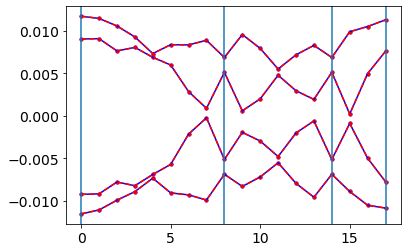

In [22]:
# draw_heatmap( 'kx', 'ky', 'dm0', 'dm1','dm2','dm3', 'dp0', 'dp1','dp2', 'dp3',data=df_disp)
draw_path( 'kx', 'ky', 'dm0', 'dm1','dm2','dm3', 'dp0', 'dp1','dp2', 'dp3',data=df_disp1)

In [23]:
# #For the c3 rotated Mpoints
# [KXc3z,KYc3z, Indc3z]=B1.latt.C3zLatt(d1,d2)
#     im=plt.scatter(d1,d2 ,c=d3[],s=50, cmap=color_map, marker='h')
#     im=plt.scatter(d1,d2 ,c=d3[Indc3z],s=25, cmap=color_map, marker='h')
#     im=plt.scatter(d1,d2 ,c=d3,s=10, cmap=color_map, marker='h')


def draw_path_c3(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    d4 = np.array(data.loc[:,args[3]])
    d5 = np.array(data.loc[:,args[4]])
    d6 = np.array(data.loc[:,args[5]])
    d7 = np.array(data.loc[:,args[2]])
    d8 = np.array(data.loc[:,args[3]])
    d9 = np.array(data.loc[:,args[4]])
    d10 = np.array(data.loc[:,args[5]])
    
    [KXc3z,KYc3z, Indc3z]=B1.latt.C3zLatt(d1,d2)
    
    I3=np.array(Indc3z, dtype=int)
    I32=np.array(Indc3z[I3], dtype=int)
    
    [path,kpath,HSP_index]=B1.latt.embedded_High_symmetry_path(d1,d2)
    pth=np.arange(np.size(path))
    # plt.plot(d3[path], c='b')
    # plt.plot(d4[path], c='b')
    plt.scatter(pth,d3[path], c='b', s=9)
    plt.scatter(pth,d4[path], c='b', s=9)
    # plt.plot(d5[path], c='b')
    # plt.plot(d6[path], c='b')
    plt.scatter(pth,d5[path], c='b', s=9)
    plt.scatter(pth,d6[path], c='b', s=9)
    
    
    plt.plot(d7[path], ls='--', c='r')
    plt.plot(d8[path], ls='--', c='r')
    plt.scatter(pth,d7[path], c='r', s=9)
    plt.scatter(pth,d8[path], c='r', s=9)
    plt.plot(d9[path], ls='--', c='r')
    plt.plot(d10[path], ls='--', c='r')
    plt.scatter(pth,d9[path], c='r', s=9)
    plt.scatter(pth,d10[path], c='r', s=9)
    
    
    ###c3
    sc3=20
    col_c3_1='orange'
    col_c3_2='g'
    # plt.plot(d3[I3][path], c=col_c3_1)
    # plt.plot(d4[I3][path], c=col_c3_1)
    plt.scatter(pth,d3[I3][path], c=col_c3_1, s=sc3, marker='s')
    plt.scatter(pth,d4[I3][path], c=col_c3_1, s=sc3, marker='s')
    # plt.plot(d5[I3][path], c=col_c3_1)
    # plt.plot(d6[I3][path], c=col_c3_1)
    plt.scatter(pth,d5[I3][path], c=col_c3_1, s=sc3, marker='s')
    plt.scatter(pth,d6[I3][path], c=col_c3_1, s=sc3, marker='s')
    
    
    plt.plot(d7[I3][path], ls='--', c=col_c3_2)
    plt.plot(d8[I3][path], ls='--', c=col_c3_2)
    plt.scatter(pth,d7[I3][path], c=col_c3_2, s=sc3, marker='s')
    plt.scatter(pth,d8[I3][path], c=col_c3_2, s=sc3, marker='s')
    plt.plot(d9[I3][path], ls='--', c=col_c3_2)
    plt.plot(d10[I3][path], ls='--', c=col_c3_2)
    plt.scatter(pth,d9[I3][path], c=col_c3_2, s=sc3, marker='s')
    plt.scatter(pth,d10[I3][path], c=col_c3_2, s=sc3, marker='s')
    
    
    
    #c32
    sc32=15
    # plt.plot(d3[I32][path], c='b')
    # plt.plot(d4[I32][path], c='b')
    plt.scatter(pth,d3[I32][path], c='g', s=sc32, marker='^')
    plt.scatter(pth,d4[I32][path], c='g', s=sc32, marker='^')
    # plt.plot(d5[I32][path], c='b')
    # plt.plot(d6[I32][path], c='b')
    plt.scatter(pth,d5[I32][path], c='g', s=sc32, marker='^')
    plt.scatter(pth,d6[I32][path], c='g', s=sc32, marker='^')
    
    
    plt.plot(d7[I32][path], ls='--', c='k')
    plt.plot(d8[I32][path], ls='--', c='k')
    plt.scatter(pth,d7[I32][path], c='k', s=sc32, marker='^')
    plt.scatter(pth,d8[I32][path], c='k', s=sc32, marker='^')
    plt.plot(d9[I32][path], ls='--', c='k')
    plt.plot(d10[I32][path], ls='--', c='k')
    plt.scatter(pth,d9[I32][path], c='k', s=sc32, marker='^')
    plt.scatter(pth,d10[I32][path], c='k', s=sc32, marker='^')
    
    
    for ind in HSP_index:
        plt.axvline(ind)


    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


0.14433756729740632 0.24999999999999975


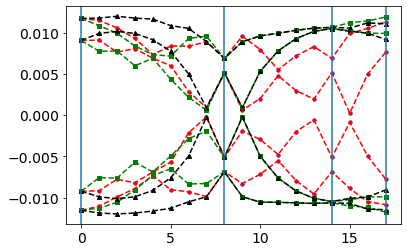

In [24]:
draw_path_c3( 'kx', 'ky', 'dm0', 'dm1','dm2','dm3', 'dp0', 'dp1','dp2', 'dp3',data=df_disp1)

0.14433756729740632 0.24999999999999975


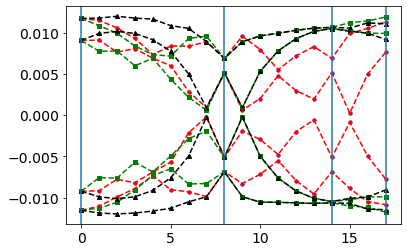

In [25]:
draw_path_c3( 'kx', 'ky', 'dm0', 'dm1','dm2','dm3', 'dp0', 'dp1','dp2', 'dp3',data=df_disp1)